# Self-Consistency Result Analysis

## GSM8K & AIME_1983_2024


📁 Starting analysis for: GSM8K (Qwen)
📂 Loading data...
📊 Calculating statistics...
✅ Total Samples: 1319
✅ Accuracy: 84.46%
❌ INVALID Predictions: 4
📈 Plot 1: Accuracy distribution pie chart


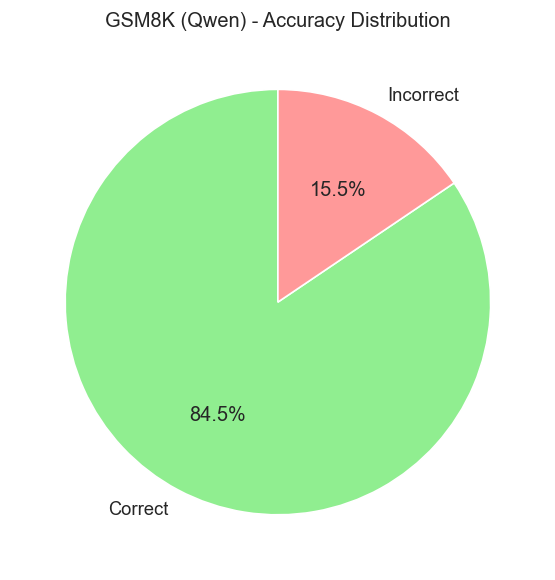

📈 Plot 2: Response length vs correctness


/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_75598/1737192176.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="correct", y="response_length", data=df, palette="Set2")


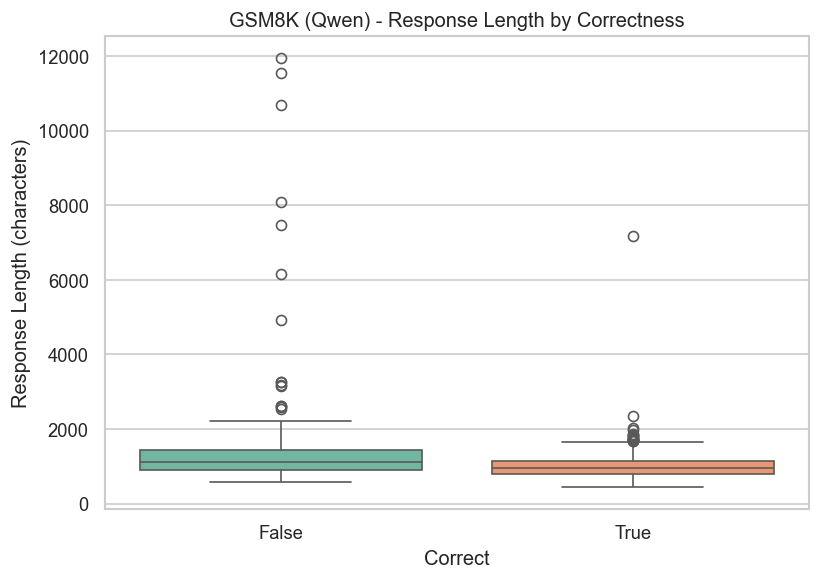

📈 Plot 3: Prompt tokens vs completion tokens


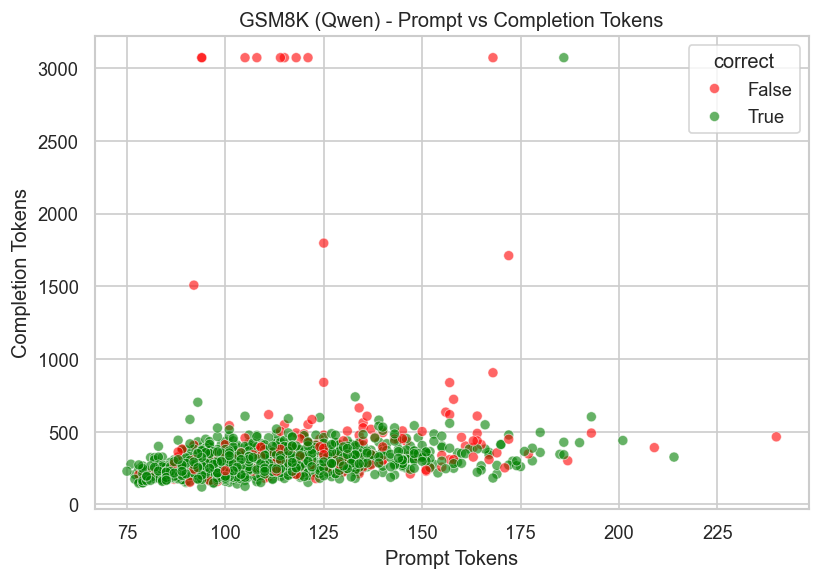

📈 Plot 4: Total token usage distribution


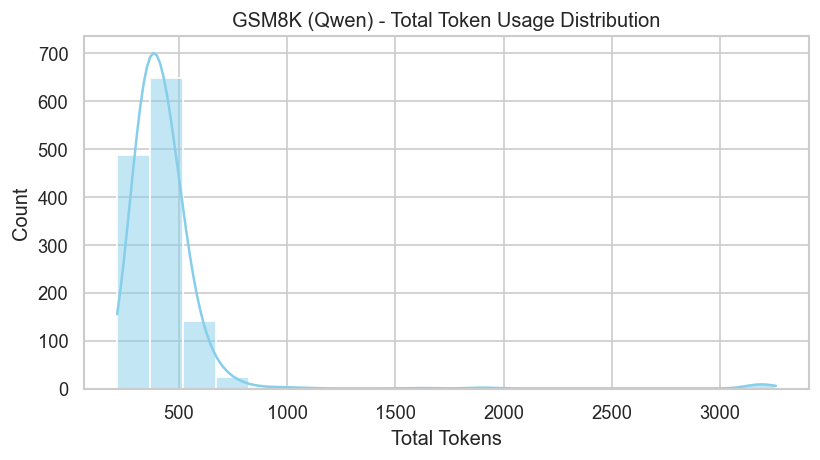

📈 Plot 5: Confidence distribution by correctness


/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_75598/1737192176.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


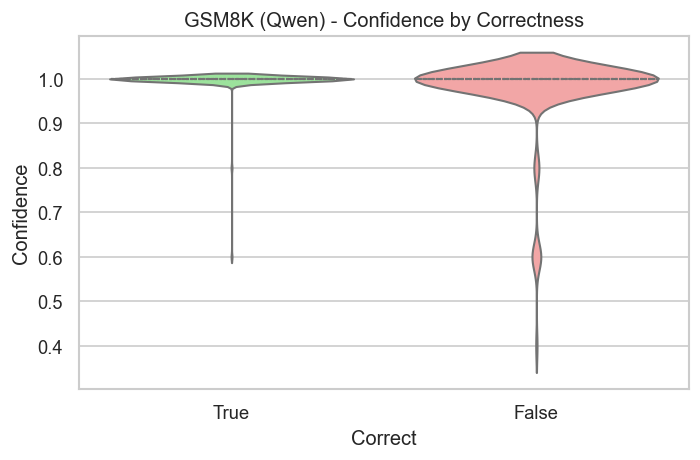

✅ Finished analysis for GSM8K (Qwen)


📁 Starting analysis for: AIME (Qwen)
📂 Loading data...
📊 Calculating statistics...
✅ Total Samples: 933
✅ Accuracy: 29.47%
❌ INVALID Predictions: 0
📈 Plot 1: Accuracy distribution pie chart


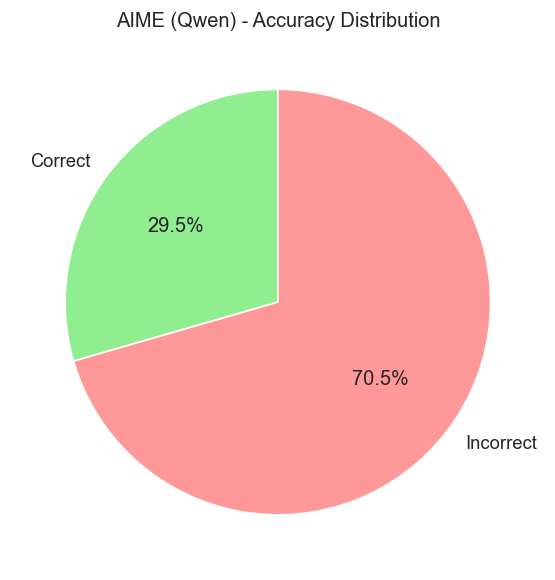

/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_75598/1737192176.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="correct", y="response_length", data=df, palette="Set2")


📈 Plot 2: Response length vs correctness


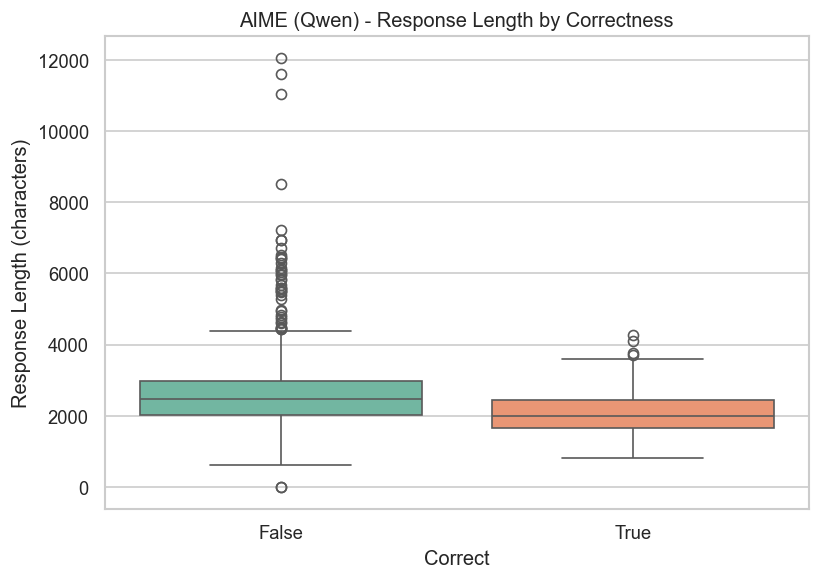

📈 Plot 3: Prompt tokens vs completion tokens


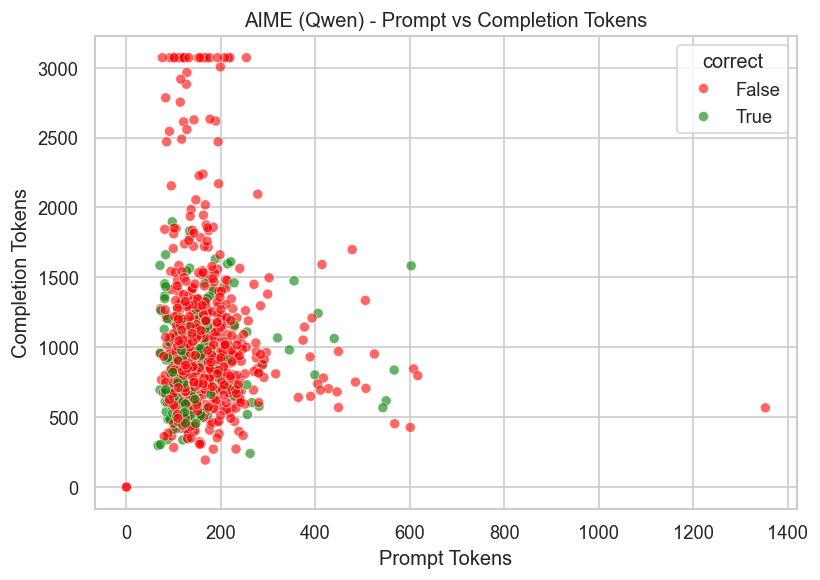

📈 Plot 4: Total token usage distribution


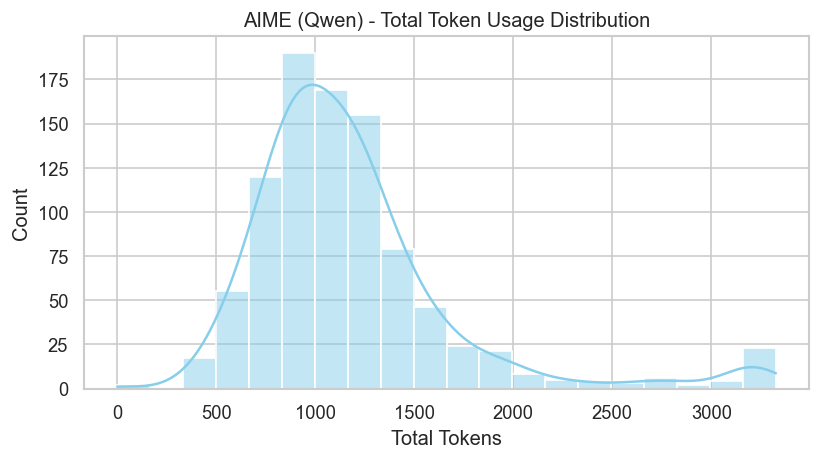

📈 Plot 5: Confidence distribution by correctness


/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_75598/1737192176.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


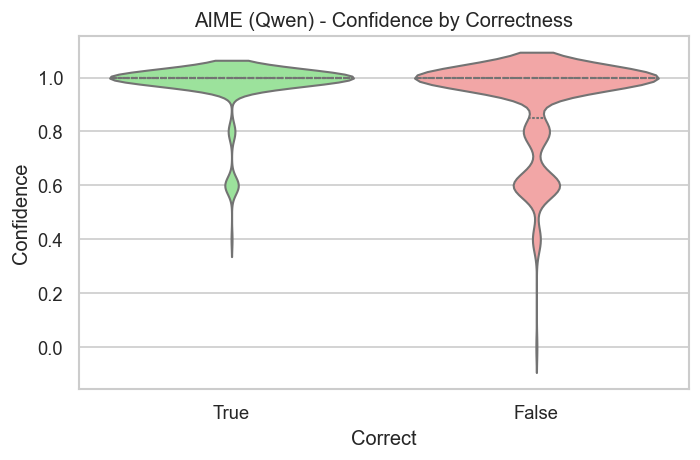

✅ Finished analysis for AIME (Qwen)



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style
plt.rcParams['figure.dpi'] = 120
sns.set_theme(style="whitegrid")


def analyze_dataset(filepath, dataset_name):
    print("\n" + "=" * 60)
    print(f"📁 Starting analysis for: {dataset_name}")
    print("=" * 60)

    # Load data
    print("📂 Loading data...")
    df = pd.read_csv(filepath)
    df["correct"] = df["correct"].astype(bool)

    # Basic statistics
    print("📊 Calculating statistics...")
    total = len(df)
    num_correct = df["correct"].sum()
    accuracy = num_correct / total
    num_invalid = df["predicted_answer"].apply(lambda x: str(x).strip().upper() == "INVALID").sum()

    print(f"✅ Total Samples: {total}")
    print(f"✅ Accuracy: {accuracy:.2%}")
    print(f"❌ INVALID Predictions: {num_invalid}")

    # Figure 1: Accuracy pie chart
    print("📈 Plot 1: Accuracy distribution pie chart")
    correct_count = df["correct"].sum()
    incorrect_count = len(df) - correct_count

    plt.figure(figsize=(5, 5))
    plt.pie(
        [correct_count, incorrect_count],
        labels=["Correct", "Incorrect"],
        autopct="%.1f%%",
        colors=["#90ee90", "#ff9999"],
        startangle=90
    )
    plt.title(f"{dataset_name} - Accuracy Distribution")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # Figure 2: Response length boxplot
    print("📈 Plot 2: Response length vs correctness")
    plt.figure(figsize=(7, 5))
    sns.boxplot(x="correct", y="response_length", data=df, palette="Set2")
    plt.title(f"{dataset_name} - Response Length by Correctness")
    plt.xlabel("Correct")
    plt.ylabel("Response Length (characters)")
    plt.tight_layout()
    plt.show()

    # Figure 3: Prompt vs Completion Tokens
    print("📈 Plot 3: Prompt tokens vs completion tokens")
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        x="prompt_tokens",
        y="completion_tokens",
        hue="correct",
        data=df,
        palette={True: "green", False: "red"},
        alpha=0.6
    )
    plt.title(f"{dataset_name} - Prompt vs Completion Tokens")
    plt.xlabel("Prompt Tokens")
    plt.ylabel("Completion Tokens")
    plt.tight_layout()
    plt.show()

    # Figure 4: Total token histogram
    print("📈 Plot 4: Total token usage distribution")
    plt.figure(figsize=(7, 4))
    sns.histplot(df["total_tokens"], bins=20, kde=True, color="skyblue")
    plt.title(f"{dataset_name} - Total Token Usage Distribution")
    plt.xlabel("Total Tokens")
    plt.tight_layout()
    plt.show()

    # Figure 5: Confidence violin plot
    print("📈 Plot 5: Confidence distribution by correctness")
    plt.figure(figsize=(6, 4))
    sns.violinplot(
        x="correct",
        y="confidence",
        data=df.astype({"correct": str}),
        palette={"True": "#90ee90", "False": "#ff9999"},
        inner="quartile"
    )
    plt.title(f"{dataset_name} - Confidence by Correctness")
    plt.xlabel("Correct")
    plt.ylabel("Confidence")
    plt.tight_layout()
    plt.show()

    print(f"✅ Finished analysis for {dataset_name}")
    print("=" * 60 + "\n")


# === Run for both datasets ===
analyze_dataset("results/self_consistency_gsm8k_qwen.csv", "GSM8K (Qwen)")
analyze_dataset("results/self_consistency_aime_qwen.csv", "AIME (Qwen)")
